<a href="https://colab.research.google.com/github/dla9944/apatheia/blob/main/pandas_plus(concat%2C%20pivot_table%2C%20resampling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

## Pandas 요약

* Numpy : 다차원 배열 데이터
   * 정해진 길이, 정해진 타입, 정수 인덱스
   * 벡터화 연산 ↔ 리스트 연결, 복사...
   * 특정한 배열에 속한 원소들에 대해서 반복적 연산
   * 불리언 인덱스 배열 ◀ 필터링
* Pandas : 2차원 배열, 행렬 형태의 딕셔너리 같이 키를 갖고 있는 데이터 (행과 열 모두 인덱스)
   * 엑셀, 표 형태의 일반적으로 볼 수 있는 데이터
   * 값들은 배열입니다 (열 단위의) → numpy, ndarray
   * 값마다 인덱스가 배정되어 있습니다. 인덱스는 굳이 정수일 필요가 없고, 특정한 값을 붙여줍니다. 이것이 '라벨'. 문자열, 정수, 시간, 날짜... → 인덱싱, 인덱서로 호출합니다.
   * '라벨' → 딕셔너리 유사 → 키를 통해서 데이터 묶음에다가 특정한 데이터를 CRUD, 생성, 읽기, 수정, 삭제합니다

 >  ✍ 데이터 분석, 특성을 확인하기 위한 작업 → Pandas → 인간이 보기가 좋음 (이해, 분석)  <br> 모델링, 프로그램 → 컴퓨터가 작업을 해주기 위한 형태로 변형 → Numpy → 속도가 빠르고, 컴퓨터가 효율적으로 변형, 분석합니다.

 

시리즈 (Series)

Serial / Series ; (영, 미) 연속되어 있다
→ 배열(Array), 리스트(List)
  * 이름 : 원소들마다 부르는 이름
  * 사물함(키-값) → 딕셔너리

```
pd.Series(...) # 연속된 데이터 묶음
# 리스트, 배열 등을 삽입
# index : 연속된 데이터 묶음 → 시리즈 내의 데이터와 매칭이 되는 나열된 이름들
# → 시리즈 내의 데이터와 매칭이 되는 나열된 이름들
$ index를 안 넣어주면 range, arange 같이 해당 길이와 맞는 정수 인덱스가 자동으로 부여됨 (0~len)
```




In [ ]:
import pandas as pd

In [ ]:
series = pd.Series([9904312, 3448737, 2890451, 2466052],   # 연속된 데이터 묶음 (리스트, 튜플, 1차원 배열...)
              index=["서울", "부산", "인천", "대구"]) # 넣어준 데이터의 길이와 일치하는 인덱스 묶음을 넣으면 
                                                      # 순서대로 짝지어서 데이터가 들어갑니다 
                                                      # 인덱스를 안 넣어주면 range 비슷하게 생성 (길이가 맞춰서)
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

* `s.index` : 시리즈의 인덱스 (라벨링 된 이름들)
* `s.values` : 시리즈의 값(배열) ▶ 같은 타입

In [ ]:
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [ ]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [ ]:
s.values

array([9904312, 3448737, 2890451, 2466052])

* `s.name`, `s.index.name` : 시리즈 자체나 인덱스의 이름을 붙일 수 있습니다

## 시리즈 연산
* Numpy 배열(ndarray)과 유사합니다. 그래서 **벡터화 연산**이 가능합니다.
* 연산 자체는 '값'(배열) ▶ 인덱스 적용이 안됩니다.

## 시리즈 인덱싱과 슬라이싱
* 시리즈 : 배열이자 딕셔너리와 유사하기 때문에 numpy배열에서 사용 가능한 인덱스 방법(정수 인덱싱, 배열 인덱싱) 전부 사용 가능합니다.
* 인덱스 라벨을 이용한 인덱싱도 가능합니다. 딕셔너리 처럼 키로 호출할 수 있습니다

인덱싱이 가능하다는 것은 슬라이싱(부분집합 만들기)도 가능합니다. 일종의 사물함

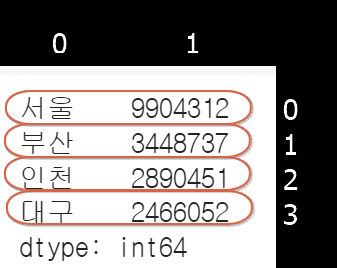

In [ ]:
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

## 벡터화 연산 ▶ 모든 데이터에 대한 특정 조건 만족 여부 (T/F)
→ ==, ><, ... ▶ 불리언 배열 ▶ 불리언 배열 인덱싱이 시리즈에서도 가능합니다

## 슬라이싱

* 라벨 슬라이싱 ▶ 다른 점은 범위를 지정했을 때, ("a":"b") 가 라벨 슬라이싱에서는 b가 포함 됩니다.
* 판다스 → 라벨을 통해서 해당 데이터를 속성처럼 호출할 수 있습니다
`series.속성명` → 해당 라벨을 호출해서 사용합니다
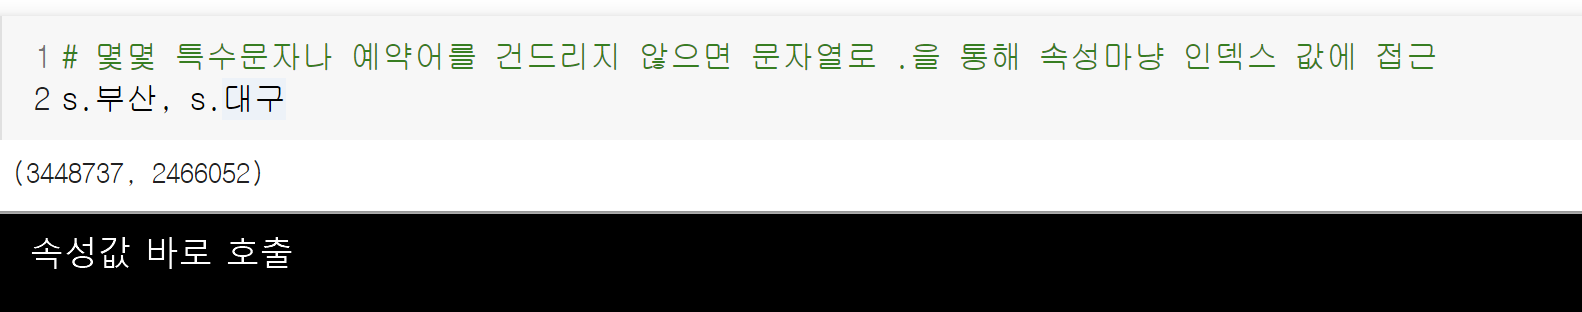

* 변수명으로 지정할 수 있는 일반적인(공백없는) 단어들로 구성된 라벨은 시리즈에 `.` 을 통해서 속성으로 호출

## 인덱스 기반 (시리즈 간) 연산
* 시리즈는 value에 한해서 벡터화 연선
* 시리즈 들 간에도 벡터화 연산
* 인덱스 라벨 일치하는 값들에 한해서 시리즈 간 연산
* 라벨이 일치하지 않는다 (한 쪽에 라벨이 비어 있습니다) → `NaN`
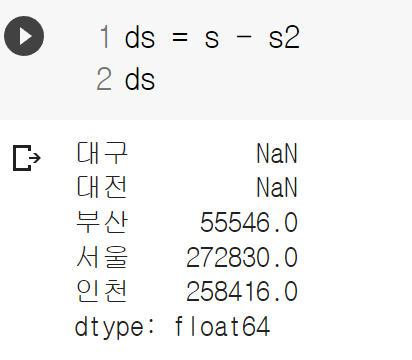

* `NaN` 은 `Null : series.notnull()` : 불리언 배열 값 인덱싱을 비어있지 않은 값들을 호출합니다

## 데이터의 갱신, 추가, 삭제 (인덱싱)

* 딕셔너리처럼 인덱싱해서 → 새로운 키 값을 주면 해당 키 값에 대해서 새로운 값을 할당합니다. 기존에 존재하던 키를 호출한 다음에 수정. `del`로 지워주면 됩니다.
* 배열처럼 인덱싱해서 새롭게 키를 만들어서 처리할 수 없습니다. 배열이기 때문입니다.

## 데이터프레임 (DataFrame)
* 시리즈 : 1차원 배열 데이터 + 행방향 인덱스
* 데이터프레임 : 2차원 배열 데이터 + 행방향 인덱스 & 열방향 인덱스

### 데이터프레임 생성
* 하나의 열이 될 수 있는 데이터 묶음(리스트, 일차원)
  ` + 원하는 만큼의 구성할 열
* 열의 이름을 키로 가지는 딕셔너리 → 키 : 연속된 데이터(타입이 다 동일해야 합니다)
* 이 데이터를 'pd.DataFrame( )` 으로 넣어줍니다.
    * 열 방향 인덱스를 넣어주고 싶다 : `pd.DataFrame(columns=...)`
    * 행 방향 인덱스를 넣어주고 싶다 : `pd.DataFrame(index=...)`


In [ ]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [ ]:
df.values # 데이터 (배열)


array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [ ]:
df.columns # 열 이름들, 컬럼들(열방향 인덱스)


Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [ ]:
df.index # 행 이름들, 행방향 인덱스


Index(['서울', '부산', '인천', '대구'], dtype='object')

In [ ]:
df.T # 데이터프레임의 행 → 열, 열 → 행

,서울,부산,인천,대구
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


In [ ]:
df['2015'] # 새로운 데이터를 넣어줌 (길이가 맞아야 함)
#df.shape → (행 길이, 열 길이) → 행의 길이

SyntaxError: ignored

## 열 인덱싱

* 열과 행의 위치를 뒤바꿔 버립니다

In [ ]:
df[열 라벨] = 시리즈
df[[열1, 열2]] = 데이터 프레임
# df[0] -> 특정 라벨을 인덱스에 넣는다 = 키값 = 열 라벨
# 정수형 인덱스 -> 딕셔너리 키 X -> 에러가 난다
# 정수형 인덱스 = 열 라벨의 이름 / 위치? -> 정수형 인덱스
# Key Error

SyntaxError: ignored

In [ ]:
df['2000'] # 단일

서울    9853972
부산    3655437
인천    2466338
대구    2473990
Name: 2000, dtype: int64

In [ ]:
df[['2010','2005']] # 복수

,2010,2005
서울,9631482,9762546
부산,3393191,3512547
인천,2632035,2517680
대구,2431774,2456016


## 행 인덱싱
* 행과 열의 위치를 뒤바꿔 버립니다

In [ ]:
# 범위로 (:) <- 슬라이싱을 한다
df[0:1]
# 정수형을 넣게되면 -> 끝점을 제외하고 범위 -> 데이터프레임
df['서울':'대전']
# 문자열을 넣게되면? -> 라벨 인덱싱 -> 끝점 포함

In [ ]:
df['서울':'부산']

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163


In [ ]:
df['인천':'대구']

,지역,2015,2010,2005,2000,2010-2015 증가율
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


## 개별 인덱싱

In [ ]:
df['열이름'] # 시리즈
df['열이름']['행이름'] # 개별값

KeyError: ignored

In [ ]:
df['2000']['서울']

9853972

## 데이터 입출력

✋(자주 안쓴다고 함)
* 데이터 → pandas → 표 형태의 데이터
* csv - excel과 유사해보입니다. 엑셀은 서식(폰트, 꾸미기) 등이 존재해서 속도가 느리고 용량이 큽니다.
* 하지만 csv는 핵심만 남겨서 데이터 자체와 데이터를 구분해주는 콤마 만 가지고 데이터를 구분해줍니다.
* 용어 : comma seperated value

In [ ]:
read_xxx / to_xxx

NameError: ignored

In [ ]:
pd.read_csv("파일이름") # 경로, url

FileNotFoundError: ignored

In [ ]:
pd.read_excel(...) / pd.to_excel(...)

ValueError: ignored

## 입출력 추가 명령어

* df # 읽어와서 무엇부터 볼 것인가
* df.head() # 괄호 안에 갯수를 넣으면 상단부터 불러올 갯수를 지정합니다
* df.tail() # 괄호 안에 갯수를 넣으면 하단부터 불러올 갯수를 지정합니다.

## 데이터프레임의 고급 인덱싱 (`loc`, `iloc`)

* 인덱싱 → 특정한 데이터를 골라내는 것
→ (기준) → 라벨 인덱스, 배열 - 정수인덱스
* 기본 인덱싱(` [ ] `) : 열(라벨, 라벨리스트), 행(`:` 라벨 범위)
* Numpy에서 행렬 기반으로 인덱싱 ↔ pandas의 기본 인덱싱과 매칭이 안됩니다
* 행, 열 기반으로 인덱싱을 하고 싶을때 `loc`, `iloc`를 사용

### 설명
* loc : 라벨 인덱스 (딕셔너리 키)
* iloc : 정수 인덱스 (리스트, 배열에서의 나열된 원소의 위치)


#### 일반적인 메소드

`( )` 소괄호 사용

#### loc와 iloc

* '[ ]' 대괄호 사용
* `indexer` 인 (r_, c_) 사용

##loc 시작

##기능

df.loc[행 인덱싱 값]

df.loc[행 인덱싱 값, 열 인덱싱 값]


In [ ]:
df.loc[행 인덱싱 값] # 행만 넣어주거나요
df.loc[행 인덱싱 값, 열 인덱싱 값]
# 행, 열을 순서대로 넣어주거나 <정수>, 문자열 인덱스를 넣어줍니다.
range, arange

SyntaxError: ignored

### 들어갈 수 있는 것
인덱스 데이터, 인덱스 데이터 슬라이스, 인덱스 데이터리스트, 
<br>같은 행 인덱스를 가지는 불리언 시리즈(행 인덱싱의 경우), 위의 값들을 반환하는 함수


In [ ]:
df.loc[행 인덱싱 값] # 행만 넣어주거나요
df.loc[행 인덱싱 값, 열 인덱싱 값]
# 행, 열을 순서대로 넣어주거나 <정수>, 문자열 인덱스를 넣어줍니다.
range, arange
# 인덱스 데이터 / df.loc['서울']df.loc[0] 행
# 인덱스 데이터 슬라이스
# df.loc['서울':'부산']df.loc[0:1] (라벨)
# df.loc 불리언 배열 인덱싱 (필터링)도 가능합니다


SyntaxError: ignored

" : " 은 모든 것을 검색

In [ ]:
df.loc[행] << df.loc[열] # 행부터는 넣어도 되고, 열부터 넣으면 안됩니다. 행부터 넣으면 key error
df.loc[:,열] = df[열 정보값] 

SyntaxError: ignored

## iloc 시작


## 설명

* iloc 는 라벨이 아니라 순서를 나타내는 integer + loc
* loc 도 정수를 사용할 수 있지만 부여된 정수만을 사용합니다. 단, 0번 자리인데 100이 들어가는 것은 불가능
* iloc는 우리가 부여한 값이 아니라 value(배열) 에서의 위치를 의미합니다 (절대값은 수정 x)

### 들어갈 수 있는 것
df.iloc[행 순서 정수 인덱스]

df.iloc[행 순서 정수 인덱스, 열 순서 정수 인덱스]


* 슬라이스는 작동하고 끝은 포함하지 않습니다.

In [ ]:
df.iloc [행 순서 정수 인덱스]
df.iloc [행 순서 정수 인덱스, 열 순서 정수 인덱스]


SyntaxError: ignored

### 중대한 차이점

* loc : 조건을 넣어서 필터링 가능
* iloc : list 인덱싱 X

## 데이터프레임 데이터 조작

* 데이터프레임

1. 2차원 배열 (열들끼리는 같은 dtype, 행들 사이는 X) / numpy에서 지원하는 2차원 배열, 행렬 → 메소드, 속성, 기능 공유한다.
2. ‘열’ 이름을 키로 가지는 딕셔너리 → 라벨 인덱스 (키, 이름) → 호출 → ‘행’ 이름. (열 라벨 인덱스, 행 라벨 인덱스…)

In [ ]:
series = pd.Series([9904312, 3448737, 2890451, 2466052],   # 연속된 데이터 묶음 (리스트, 튜플, 1차원 배열...)
              index=["서울", "부산", "인천", "대구"])

In [ ]:
series.count() # 값을 세줄 수 있다
# 카운트는 값이라고 합니다. 결측치(NaN)은 빼고 세기 때문입니다. (계산할 수 없는, 값으로 취급되지 않는 것들은 제외한다)
# 행의 개수가 10개인데, 왜 값이 9개 나오는가요. => 1개의 NaN (결측치)가 포함됩니다

4

In [ ]:
df.count(axis = 0) # 열마다의 갯수 ( axis )
# axis = 0은 행의 갯수, 1은 열마다의 갯수

지역               4
2015             4
2010             4
2005             4
2000             4
2010-2015 증가율    4
dtype: int64

In [ ]:
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


### head부터 describe 까지
* df.head() : 상위 5개 추출
* df.tail() : 하위 5개 추출

* df.info() : 열들의 이름, 결측치가 아닌 데이터의 갯수, 열의 Dtype 확인
* df.describe () : 열들의 통계적 특성 또는 빈도, 고유값의 갯수 확인<br>
    기본적으로 연속형 변수
    

In [ ]:
import seaborn as sns # 데이터 시각화 패키지
titanic = sns.load_dataset('titanic') # pd.read_csv... url...
titanic
df = titanic

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe(include='O') # object는 범주형 변수

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## 범주(카테고리) 데이터의 갯수 세

In [ ]:
df['열이름'].value_counts()
# 1. 중복되지 않는 고유값들 2. 각 값들의 빈도수
# 빈도수가 높은 순서대로 내림차순

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
                          58.0  0      0      26.5500   S         First  woman  False       C     Southampton  yes    True     1
                          49.0  0      0      25.9292   S         First  woman  False       D     Southampton  yes    True     1
                                1      0      76.7292   C         First  woman  False       D     Cherbourg    yes    False    1
                          50.0  0      1      247.5208  C         First  woman  False       B     Cherbourg    yes    False    1
                                                                                                                              ..
                          16.0  0      0      86.5000   S         First  woman  False       B     Sout

In [ ]:
df['age'].value.count()

AttributeError: ignored

In [ ]:
s.value_counts()

9904312    1
3448737    1
2890451    1
2466052    1
dtype: int64

In [ ]:
df['열이름'].value_counts()
# 1. 중복되지 않는 고유값들 2. 각 값들의 빈도수
# 빈도수가 높은 순서대로 내림차순

KeyError: ignored

## 정렬

> index 기준으로 정렬
 * df.sort_index : 행 인덱스를 기준으로, 큰지 작은지 결정
 * axis가 1인 경우 열 인덱스

>>series의 경우
 * series.sort_index() 로 정렬
 * ascending = True/False : 오름차순/내림차순

> value 기준으로 정렬
 * df.sort_values() : by 기준으로 될 열 이름을 넣습니다
 * s.sort_values()
 * df.sort_values(by = '열이름1','열이름2')

## 합계

* df는 열, 행방향이 있습니다. axis를 기준으로 생각하세요.

* df.sum() : 열 기준 (axis = 0) / 열을 남기고 행을 축소해줍니다.

* df.sum(axis=1) : 행 방향 합계. 행을 남기고 열을 축소해줍니다.

* df.mean() : 열 내부의 행들간의 합계. 행 인덱스가 열 이름으로 붙어서 나옵니다.
* df.mean(axis = 1) : 행 내부의 열들간의 합계. 열 인덱스가 행 이름으로 붙어서 나옵니다.

### `apply` 변환

* sum : 합계 , mean : 평균 ... 
* 임의 정의된 함수를 행/열 단위로 적용하고 싶은 경우
* df.apply(함수, axis = 축) 
* df[열 이름].apply(...) : 특정한 열에 대해서 처리
 axis = 1이면 행
 lambda row(행) : row. 컬럼들을 호출해서 통계적 작업을 할 수 있습니다.

1. 함수는 이미 정의된 함수를 씁니다.
* print, ... apply : 인자로 값 한 개를 받는 함수
* axis = 0 : 열 단위
df.apply(...) : 모든 열에 대해서 처리
* axis = 1 : 행 단위

🏮 axis 0과 axis1은 차이가 있다는 점이 쟁점

In [ ]:
def fun1(x) :
  return ...

### 람다 함수 사용
>  구조 <br>
lambda (인자들) : 인자들을 사용한 표현식

lambda x : x.표현식 (표현식에는 return이 들어감) 


### fillna(...)

* df이나 series 상에서의 NaN 값들에 특정한 값들을 대입해서 만듭니다

* df.fillna 나 series.fillna

df[열].astype(자료형)
df.astype(자료형)
* 원하는 자료형으로 변환



* df.set_index('인덱스가 될 기존 열 이름')
: 이전에 있던 인덱스가 지워지고 지정한 인덱스가 들어갑니다.

* df.reset_index(...)
: 현재 인덱스를 지우거나 새로운 열로 빼고, 0부터 시작하는 정수 순서 인덱스로 바꿔줍니다.
<br>df.reset_index(drop = True/False)
drop은 삭제해주겠다는 의미 (default:False)
<br>True : 기존에 인덱스가 새로운 열이 안되고 삭제
<br>False(Default) : 기존의 인덱스가 새로운 열로 추가


### 데이터 프레임의 합성

* 결합, 연결을 합성이라 합니다.
* concatenate, join, merge
* concattenate : 행 또는 열의 모양이 일치하는 두 데이터프레임 간의 연결입니다
* merge, join : 특정한 키(열)을 기준으로 다른 두가지 모양의 데이터프레임을 합쳐줍니다
> 1. 두 개의 데이터프레임이 같은 숫자의 행을 가지고 1개씩의 키값을 가졌을 때
<br>1 : 1로 하나씩 짝지어짐<br>
> 2. 두 개의 데이터프레임이 키로 사용하는 열이 공통의 원소를 가지고 있으나, 원소의 갯수가 차이가 있을 때 사용<br> 1:M로 복제되어서 한 개인 것이 나머지 것들을 다 채움
> 3.한쪽 데이터프레임에는 있고, 다른 쪽에는 없을 때(pd.merge(left, right, how=?)
a. inner join : 둘 다 존재할 때만 남기겠다.
b. (full) outer join : 한 쪽에라도 존재하면 남기겠다
c. left (outer) join, right (outer) join : 지정된 방향의 데이터프레임에 존재할 때만 남기겠다.
   * 게시판 : 게시물 ↔ 댓글 / 게시판을 날리고 싶어서 게시물을 삭제했다면, 댓글은 굳이 신경쓰지 않아도 삭제되는 것입니다. left join은 이와 같습니다.
   * 남성/ 여성 - 연결 → 여성 0
* 연결할 때 기준이 되는 열을 조작해야 합니다 = on : 특정한 키(열 이름), 키의 리스트(left_on, right_on)과 같은 다름으로 지정할 수 있음

* 연결 기준이 되는 인덱스 쪽으로 방향_index=True
* df.join(...) 
  * 연결을 행 단위로 인덱스가 겹칠경우 연결합니다
  * df가 left 역할을 합니다



### concat (합치려는 방향의 모양만 같으면 됩니다)

* numpy에서 concatenate와 유사
* pd.concat([...]) : 합치려는 데이터프레임과 유사한 모양의 데이터프레임,
시리즈의 경우 유사한 시리즈를 리스트로 넣어줍니다.
* axis = 0 : 수직 방향으로 합체
* axis = 1 : 수평 방향으로 합체

In [7]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])
s1, s2

(A    0
 B    1
 dtype: int64, A    2
 B    3
 C    4
 dtype: int64)

In [4]:
# pd.concat 첫번째
pd.concat([s1, s2])
pd.concat([s1, s2], axis=0)

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [8]:
# pd.concat 두번째
pd.concat([s1, s2], axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


## 피벗테이블과 그룹분석

### 피벗테이블

1. 여러 개의 열 중에서 2개를 선택하여, 열을 기준으로 데이터를 강조하겠다

* 보고나서 집어던지는 보고서

In [13]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns = columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


* 집어던지지 않는 보고서 (데이터)

In [12]:
df1.pivot('도시','연도','인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


> 구조 <br>
**df.pivot('행 인덱스 이름' , '열 인덱스 이름' , '표현할 데이터 이름')**

인덱스 별로 배치했는데 해당되는 데이터가 없으면 NaN이 도출됩니다.

조건을 만족시키는 데이터가 2개 이상일 경우에는 오류가 도출됩니다.<br>
이러할 경우에는 그룹 연산을 하고, 그 결과를 갖고 피벗테이블을 제작해야 합니다

### 그룹분석

> 특정한 범주나 특정한 조건을 만족시키는 데이터(행)가 하나 이상일 경우<BR>
데이터 그룹으로 지정할 수 있습니다.
* 데이터 그룹은 그룹의 특성을 보여주는 하나의 값으로 <BR>그것을 요약하는 것입니다.

1. 분류 : 'groupby'
2. 계산 : 'agg' 를 비롯한 그룹합수들
> 구조<br> ★ 'df.groupby()'  : 넣어준 인자를 기준으로 그룹을 나눕니다
df.groupby(열 or 열의 리스트)
3. 



In [ ]:
df.groupby.groups(속성) : 그룹별 구성 현황


In [20]:
p = df1.groupby(df1.연도)
p

In [22]:
p.groups

{'2005': [2, 5], '2010': [1, 4, 7], '2015': [0, 3, 6]}

count, meat, sum 등

시리즈

In [ ]:
df.groupby(x).agg().열이름

### 복합키 : df.groupby([ 열 2개 이상] ) : 2개 이상의 조건으로 세부 조건을 지정



In [24]:
df1.groupby(df1.인구).sum().연도

인구
263203     2010
2890451    2015
3393191    2010
3448737    2015
3512547    2005
9631482    2010
9762546    2005
9904312    2015
Name: 연도, dtype: object

* .unstack : 묶여져 있는 columns 제거

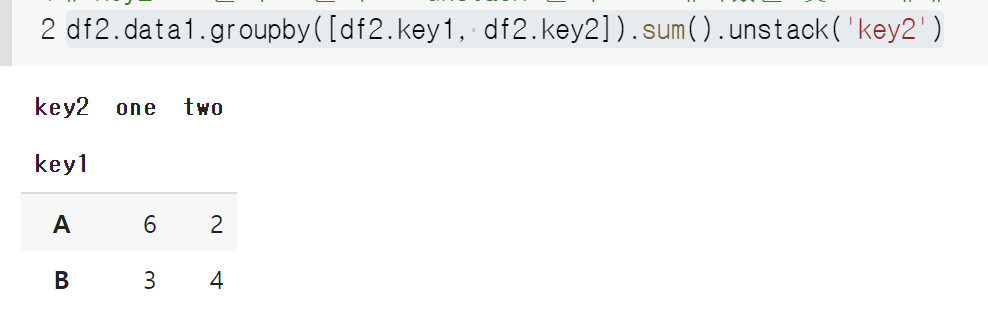

* .agg : 본인이 필요한 그룹함수가 없을 때 직접 정의해서 사용할 수 있습니다.
그룹 전체를 하나로 차원 축소
1. 함수로 정의해서 (한개의 인수를 가져오고, 그 인수가 그룹을 의미하게 합니다) 그것을 집어 넣어서 사용


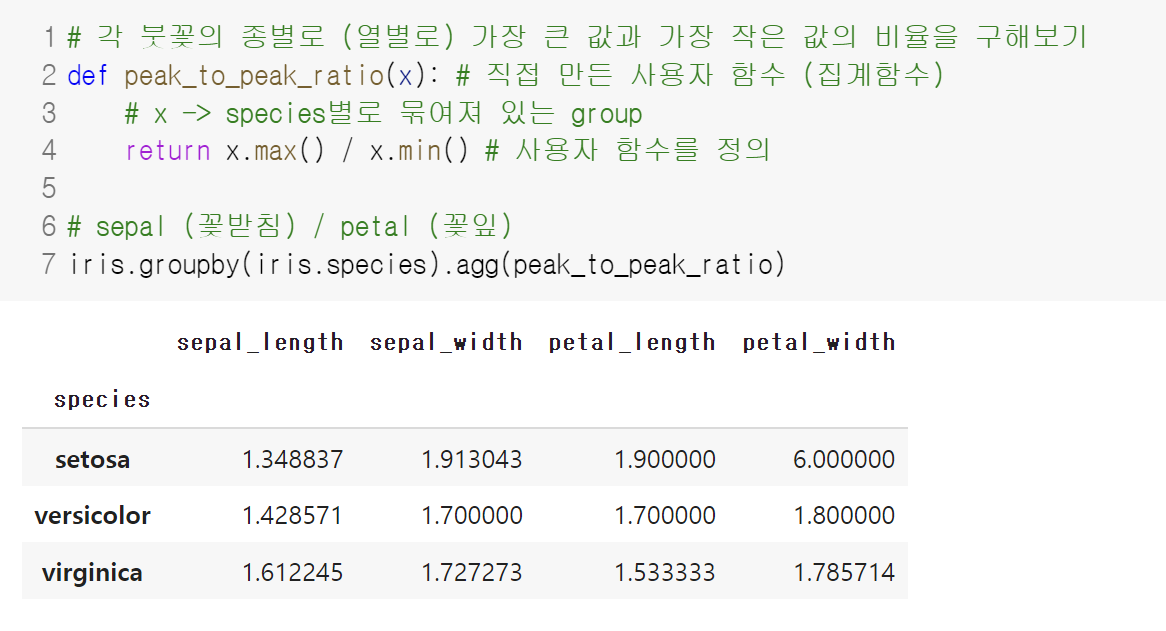

2. lambda를 사용해서 진행

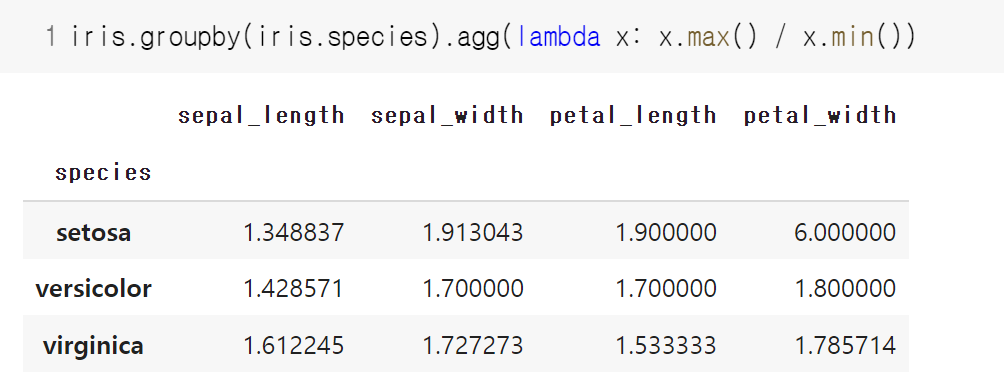

* .apply : 그룹으로 묶은 행 or 열 들을 대상으로 반복적으로 연산합니다.
  * 그룹1, 그룹2, 그룹3, 등 그룹 간 반복 연산 
  

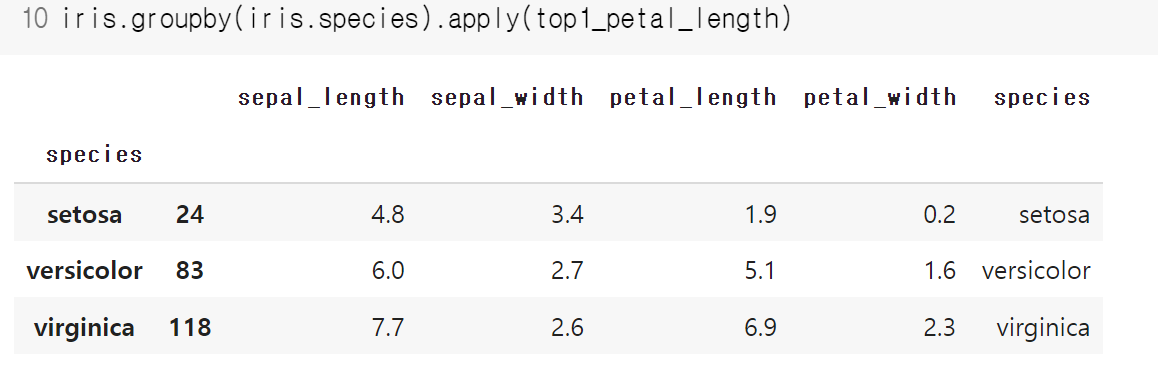

## 시계열 데이터 다루기

* 시계열 데이터 : 시간의 변화에 따라서 데이터의 변화가 발생<br>
 1) 주식 가격, 환율, 척추 수명, 
* 행 인덱스 자체를 시계열 기반 인덱스로
* .loc[] : 특정한 기준에 따른 연산과 필터링
* pd.to_datetime : 날짜 형식(포맷)으로 표현된 데이터들을 Datetimeindex로 변환
* pd.date_range : range, arange → 특정한 규칙 (시작, 끝/ 시작, 개수...)을 바탕으로 연속된 시계열 인덱스입니다

In [29]:
pd.date_range('2000-10-01','2021-10-10')


DatetimeIndex(['2000-10-01', '2000-10-02', '2000-10-03', '2000-10-04',
               '2000-10-05', '2000-10-06', '2000-10-07', '2000-10-08',
               '2000-10-09', '2000-10-10',
               ...
               '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10'],
              dtype='datetime64[ns]', length=7680, freq='D')

  * freq : frequency(빈도 수) : D , M , H , MS 를 통해서 중간의 갯수를 설정함


In [30]:
pd.date_range(start='2018-4-1', periods=30, freq='MS')

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

### SHIFT

* 인덱스를 옮겨주기
* 인덱스 순서는 그대로 두고, 연속된 데이터의 위치를 변화합니다

In [31]:
np.random.seed(9)
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2018-1-1', periods=4, freq='M'))
ts

2018-01-31    0.001109
2018-02-28   -0.289544
2018-03-31   -1.116066
2018-04-30   -0.012883
Freq: M, dtype: float64

* 데이터가 전개되는 방향
<br>행은 가만히 있고, 열만 shift 합니다
> 양수 : 아래로<BR>
> 음수 : 위로

In [34]:
ts.shift(-1)

2018-01-31   -0.289544
2018-02-28   -1.116066
2018-03-31   -0.012883
2018-04-30         NaN
Freq: M, dtype: float64

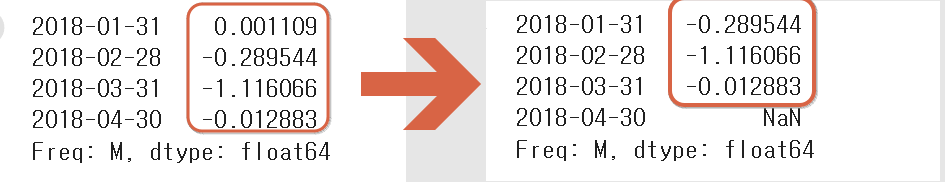

In [33]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    0.001109
2018-03-31   -0.289544
2018-04-30   -1.116066
Freq: M, dtype: float64

## resample 연산

* 데이터의 시간 빈도를 바꿔주는 것


In [39]:
np.random.seed(12)
ts = pd.Series(np.random.randn(100),
               index=pd.date_range('2022-1-1', periods=100, freq='D'))
ts

2022-01-01    0.472986
2022-01-02   -0.681426
2022-01-03    0.242439
2022-01-04   -1.700736
2022-01-05    0.753143
                ...   
2022-04-06   -0.969176
2022-04-07    0.871968
2022-04-08   -1.446359
2022-04-09   -0.536481
2022-04-10    0.197921
Freq: D, Length: 100, dtype: float64

### * up-sampling : 빈도 늘리기
* 시간 구간을 좁게 만들면 행이 늘어나고, 빈곳을 줄인다 > 업샘플링
  * fill (forward_fill) / bfill(backward_fill) 00 / 30 




In [37]:
# up-sampling (10분 -> 1분짜리 쪼갬) => 없던거를 만드는 거
ts.resample('30s').ffill() # 1분 -> 0.5분 => 같은 데이터를 2번
ts.resample('10s').ffill() # 1분 -> 10초(1/6분) => 같은 데이터를 6번
# f-fill (front) => 비었을 때 앞전 시간대에 존재하는 데이터로 채워줌

2018-01-31 00:00:00    0.001109
2018-01-31 00:00:10    0.001109
2018-01-31 00:00:20    0.001109
2018-01-31 00:00:30    0.001109
2018-01-31 00:00:40    0.001109
                         ...   
2018-04-29 23:59:20   -1.116066
2018-04-29 23:59:30   -1.116066
2018-04-29 23:59:40   -1.116066
2018-04-29 23:59:50   -1.116066
2018-04-30 00:00:00   -0.012883
Freq: 10S, Length: 768961, dtype: float64

upsampling : 쪼갠다

### * down-sampling : 빈도 줄이기
* 시간 구간을 넓게 만들면 행이 줄어들고(하루씩 → 한달씩) 빈곳을 늘린다 > 다운샘플링
  * 시간 단위를 키웁니다.
  * 하루 >> 한달
  * 대표값
  * 통계적 작업, 평균, 최빈값
  * first, last 위치 기준으로 표시


In [36]:
ts.resample('5T').ohlc() # 시고저종 (시작-고점-저점-종료)

,open,high,low,close
2018-01-31 00:00:00,0.001109,0.001109,0.001109,0.001109
2018-01-31 00:05:00,NaN,NaN,NaN,NaN
2018-01-31 00:10:00,NaN,NaN,NaN,NaN
2018-01-31 00:15:00,NaN,NaN,NaN,NaN
2018-01-31 00:20:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2018-04-29 23:40:00,NaN,NaN,NaN,NaN
2018-04-29 23:45:00,NaN,NaN,NaN,NaN
2018-04-29 23:50:00,NaN,NaN,NaN,NaN
2018-04-29 23:55:00,NaN,NaN,NaN,NaN


downsampling : 요약한다

In [38]:
ts.resample('W').max()

2018-02-04    0.001109
2018-02-11         NaN
2018-02-18         NaN
2018-02-25         NaN
2018-03-04   -0.289544
2018-03-11         NaN
2018-03-18         NaN
2018-03-25         NaN
2018-04-01   -1.116066
2018-04-08         NaN
2018-04-15         NaN
2018-04-22         NaN
2018-04-29         NaN
2018-05-06   -0.012883
Freq: W-SUN, dtype: float64